In [1]:
#import the packages and 

import os
import CNN 
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
#NN parameters
num_files_load = 10
num_epochs = 5
batch_size = int(num_files_load/1) #this we need to think about
learning_rate = 0.001
weight_decay = 0.0001

#breakoff parameters
min_validation_loss = float('inf') #initializing validation loss
patience = 8
min_delta = 0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#Initialize the Dataset
root_dir = r'C:\Users\marcd\Desktop\Master\Courses\Machine_Learning\Project\data\CostmiStrings\mock_data' 
#root_dir = r'/Users/boribbens/Documents/Universiteit_Utrecht/EP_Master/Semester_1/Computational_aspects_of_Machine_Learning/ML_Project/Datafolder/mock_data'
dataset = CNN.signal_dataset(root_dir=root_dir, num_files_load=num_files_load, normalized=False) # shape(10000,2,3,65536)-->(file, signal/label, telescope, time)


In [4]:
#Split into Train/Test

train_size = 0.7
validation_size = 0.2
test_size = 1 - (train_size + validation_size)

train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, validation_size, test_size])


In [5]:
#Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size = batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
# Dummy CNN

# Define the dummy CNN model
dummy_model = CNN.DummyCNN()
# Move the model to the appropriate device
dummy_model = dummy_model.to(device)
# Create a dummy input array (batch_size=1, channels=3, length=65536)
dummy_input = torch.randn(1, 3, 65536).to(device)
# Pass the dummy input through the model
output = dummy_model(dummy_input)

Input shape: torch.Size([1, 3, 65536])
Conv. 1: torch.Size([1, 16, 65532])
Pool. 1: torch.Size([1, 16, 32766])
Conv. 2: torch.Size([1, 32, 16382])
Pool. 2: torch.Size([1, 32, 8191])
Conv. 3: torch.Size([1, 64, 4095])
Pool. 3: torch.Size([1, 64, 2047])
Conv. 4: torch.Size([1, 128, 1023])
Pool. 4: torch.Size([1, 128, 511])
Conv. 5: torch.Size([1, 256, 255])
Pool. 5: torch.Size([1, 256, 127])
Conv6: torch.Size([1, 256, 64])
Pool. 6: torch.Size([1, 256, 32])
Conv. 7: torch.Size([1, 256, 16])
Flatten: torch.Size([1, 4096])
F.C 1: torch.Size([1, 256])
F.C 2: torch.Size([1, 64])
F.C 3: torch.Size([1, 1])


Training Epochs: 100%|████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.01it/s]



Evaluating on Test Data...
Test Loss: 0.6226, Test Accuracy: 1.0000


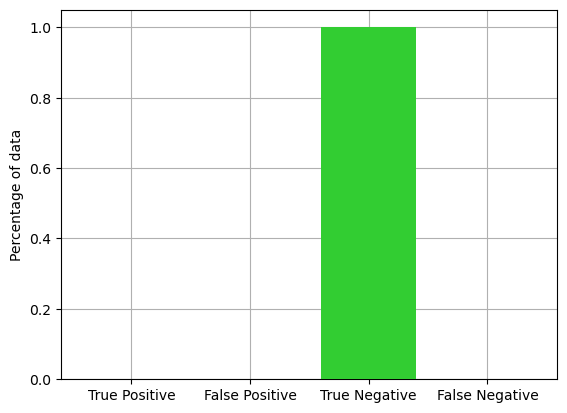

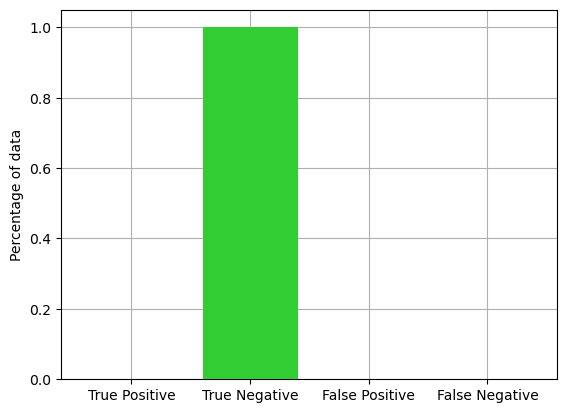

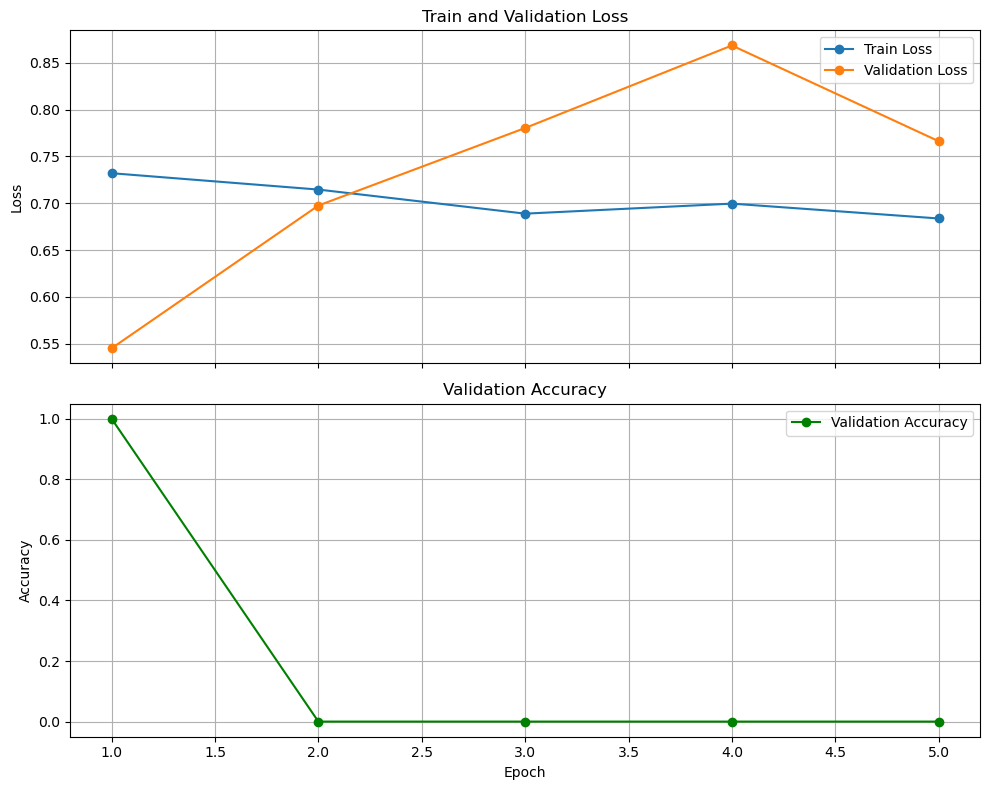

In [7]:
#Run the NN:

CNN.RunNeuralNetwork(train_loader, validation_loader, test_loader, learning_rate, weight_decay, num_epochs, patience, min_delta, Save=True, HistNameMarc='Hist', LearningName='Learning')